In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [3]:
churn_df =  pd.read_csv('Churn_Modelling.csv')

In [4]:
churn_df.head()

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [5]:
churn_df.shape

(7124, 14)

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          7124 non-null   int64  
 1   CustomerId         7124 non-null   int64  
 2   Surname            7124 non-null   object 
 3   Credit Score       7118 non-null   float64
 4   Geography          7120 non-null   object 
 5   Gender             7116 non-null   object 
 6   Age                7124 non-null   object 
 7   Tenure             7110 non-null   float64
 8   Balance            7121 non-null   object 
 9   Num of Dependents  7124 non-null   int64  
 10  Has CrCard         7111 non-null   float64
 11  Is Active Member   7114 non-null   float64
 12  Estimated Salary   7123 non-null   float64
 13  Exited             7124 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 779.3+ KB


In [7]:
churn_df.Balance.unique()
# churn_df = churn_df.apply(pd.to_numeric)

array(['3000', '83807.86', '159660.8', ..., '137145.12', '88381.21',
       '75075.31'], dtype=object)

In [8]:
churn_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
Credit Score          6
Geography             4
Gender                8
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      1
Exited                0
dtype: int64

In [9]:
churn_df.duplicated().sum()

0

In [10]:
churn_df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [11]:
churn_df.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [12]:
churn_df.Exited.value_counts(normalize=True)

0    0.714065
1    0.285935
Name: Exited, dtype: float64

In [13]:
churn_df.Balance.value_counts().sort_values()

164701.68       1
115761.51       1
112181.08       1
141581.08       1
147531.82       1
             ... 
166833.86       1
136820.99       1
130170.82       2
?               3
3000         2481
Name: Balance, Length: 4638, dtype: int64

In [14]:
churn_df.Age.value_counts().sort_values()

82      1
88      1
?       1
81      1
85      1
     ... 
36    296
33    301
35    322
38    326
37    337
Name: Age, Length: 69, dtype: int64

In [15]:
churn_df.Age.replace(to_replace='?',value=np.NaN, inplace=True)
# churn_df['Age'] = churn_df['Age'].replace('?', np.NaN)

In [16]:
churn_df.Balance.replace(to_replace='?',value=np.NaN, inplace=True)
# churn_df['Balance'] = churn_df['Balance'].replace('?', np.NaN)

In [17]:
churn_df.Age.value_counts().sort_values()

82      1
88      1
81      1
85      1
84      2
     ... 
36    296
33    301
35    322
38    326
37    337
Name: Age, Length: 68, dtype: int64

In [18]:
churn_df.Balance.value_counts().sort_values()

106012.2        1
112181.08       1
141581.08       1
147531.82       1
156555.54       1
             ... 
105214.58       1
80964.57        1
114023.64       1
130170.82       2
3000         2481
Name: Balance, Length: 4637, dtype: int64

In [19]:
churn_df.Balance.isnull().sum()

6

In [20]:
churn_df.Age.isnull().sum()

1

In [21]:
churn_df['Age']= churn_df['Age'].astype('float64')

In [22]:
churn_df['Balance']= churn_df['Balance'].astype('float64')

<AxesSubplot:>

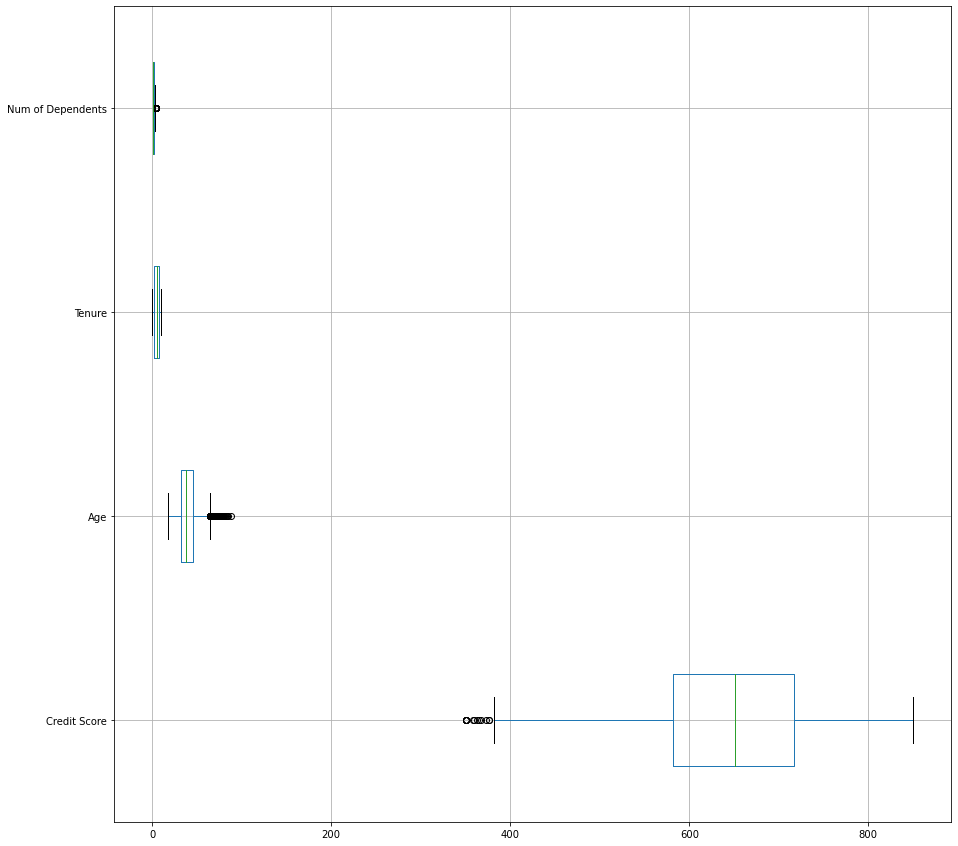

In [23]:
plt.figure(figsize=(15,15))
churn_df[['Credit Score','Age','Tenure','Num of Dependents']].boxplot(vert=0)

<AxesSubplot:>

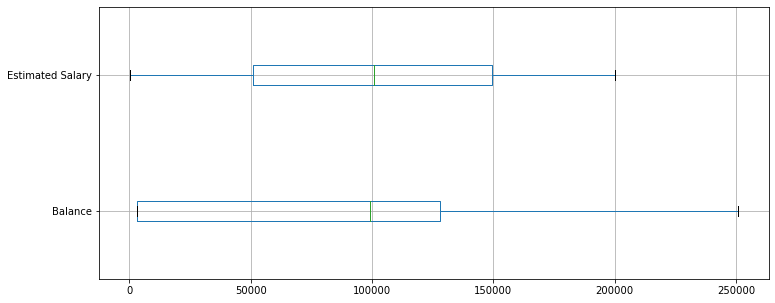

In [24]:
plt.figure(figsize=(12,5))
churn_df[['Balance','Estimated Salary']].boxplot(vert=0)

In [25]:
for column in churn_df[['Tenure', 'Balance','Estimated Salary']]:
    mean = churn_df[column].mean()
    churn_df[column] = churn_df[column].fillna(mean)

In [26]:
churn_df.isnull().sum()

Credit Score          6
Geography             4
Gender                8
Age                   1
Tenure                0
Balance               0
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      0
Exited                0
dtype: int64

In [27]:
churn_df['Credit Score'] = churn_df['Credit Score'].fillna(churn_df['Credit Score'].median())

In [28]:
# Substituting/Imputing missing values for all categorical columns
for column in churn_df[['Geography','Gender','Has CrCard','Is Active Member']]:
    mode = churn_df[column].mode()
    churn_df[column] = churn_df[column].fillna(mode[0])

In [29]:
churn_df.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  1
Tenure               0
Balance              0
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

In [30]:
churn_df['Age'] = churn_df['Age'].fillna(churn_df['Age'].mode())

In [31]:
churn_df.Balance.replace(to_replace=np.NaN,value=churn_df['Balance'].mean(), inplace=True)

In [32]:
churn_df.Age.replace(to_replace=np.NaN,value=churn_df['Age'].mean(), inplace=True)

<AxesSubplot:>

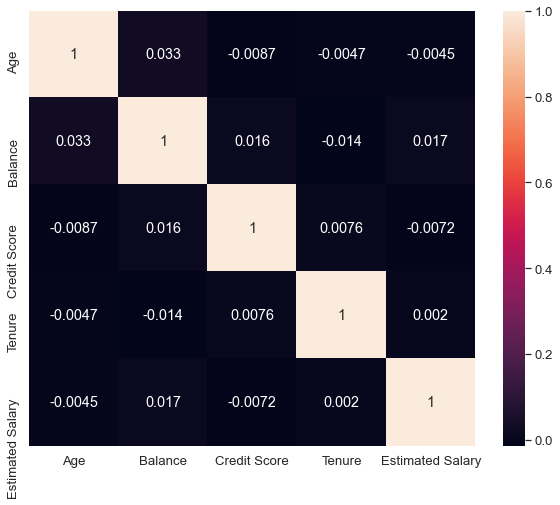

In [33]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(churn_df[['Age','Balance','Credit Score', 'Tenure', 'Estimated Salary']].corr(), annot=True)

In [34]:
for feature in churn_df.columns:
    if churn_df[feature].dtype == 'object':
        churn_df[feature] = pd.Categorical(churn_df[feature]).codes

In [35]:
churn_df.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,1,1,42.0,2.0,3000.00,1,1.0,1.0,101348.88,1
1,608.0,3,1,41.0,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,1,1,42.0,8.0,159660.80,3,1.0,0.0,113931.57,1
3,699.0,1,1,39.0,1.0,3000.00,2,0.0,0.0,93826.63,0
4,850.0,3,1,43.0,2.0,125510.82,1,1.0,1.0,79084.10,0


In [36]:
from sklearn.model_selection import train_test_split
#Extract x and y

x = churn_df.drop(['Exited'], axis=1)
y =  churn_df.pop('Exited')

In [38]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit Score       7124 non-null   float64
 1   Geography          7124 non-null   int8   
 2   Gender             7124 non-null   int8   
 3   Age                7124 non-null   float64
 4   Tenure             7124 non-null   float64
 5   Balance            7124 non-null   float64
 6   Num of Dependents  7124 non-null   int64  
 7   Has CrCard         7124 non-null   float64
 8   Is Active Member   7124 non-null   float64
 9   Estimated Salary   7124 non-null   float64
dtypes: float64(7), int64(1), int8(2)
memory usage: 459.3 KB


In [39]:
# Scaling the variables
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# churn_df = sc.fit_transform(churn_df)

In [61]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [62]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (4986, 10)
x_test:  (2138, 10)
y_train:  (4986,)
y_test:  (2138,)


In [63]:
# Scaling the variables
from sklearn.preprocessing import StandardScaler

In [64]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [66]:
#Scale the training data
# x_train =  sc.transform(x_train)

In [67]:
x_test = sc.fit_transform(x_test)

In [68]:
x_train = sc.transform(x_train)

In [69]:
# x_test = sc.transform(x_test)

In [70]:
# Building Neural Network Model

In [71]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,solver='sgd', verbose=True, random_state=1, tol=0.01)

In [72]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.74020380
Iteration 2, loss = 0.67571937
Iteration 3, loss = 0.63416596
Iteration 4, loss = 0.60978070
Iteration 5, loss = 0.59488094
Iteration 6, loss = 0.58403918
Iteration 7, loss = 0.57592817
Iteration 8, loss = 0.56908198
Iteration 9, loss = 0.56328803
Iteration 10, loss = 0.55809052
Iteration 11, loss = 0.55352169
Iteration 12, loss = 0.54928333
Iteration 13, loss = 0.54537517
Iteration 14, loss = 0.54192375
Iteration 15, loss = 0.53862261
Iteration 16, loss = 0.53559675
Iteration 17, loss = 0.53282826
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [73]:
y_pred =  clf.predict(x_test)

In [74]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,solver='sgd', verbose=True, random_state=1, tol=0.1)

In [75]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.74020380
Iteration 2, loss = 0.67571937
Iteration 3, loss = 0.63416596
Iteration 4, loss = 0.60978070
Iteration 5, loss = 0.59488094
Iteration 6, loss = 0.58403918
Iteration 7, loss = 0.57592817
Iteration 8, loss = 0.56908198
Iteration 9, loss = 0.56328803
Iteration 10, loss = 0.55809052
Iteration 11, loss = 0.55352169
Iteration 12, loss = 0.54928333
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.1, verbose=True)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
confusion_matrix(y_test, y_pred)

array([[1524,   24],
       [ 516,   74]], dtype=int64)

In [78]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train, pred2)

array([[3517,   22],
       [1358,   89]], dtype=int64)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1548
           1       0.76      0.13      0.22       590

    accuracy                           0.75      2138
   macro avg       0.75      0.55      0.53      2138
weighted avg       0.75      0.75      0.67      2138



In [80]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      3539
           1       0.80      0.06      0.11      1447

    accuracy                           0.72      4986
   macro avg       0.76      0.53      0.48      4986
weighted avg       0.74      0.72      0.63      4986



In [81]:
import matplotlib.pyplot as plt

AUC :  0.7299267535818179


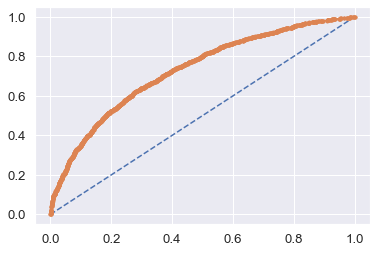

In [82]:
# AUC & ROC for the training data
# Predict probabilities
probs = clf.predict_proba(x_train)
probs = probs[: , 1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC : ', auc)

# Calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.show()